### Setup Environment:

In [1]:
# Path to main dir eq: %cd ..
%cd /home/datascience/DF-DM/

/home/datascience/DF-DM


In [2]:
from src.embeddings import load_data, split_dataset, train_and_evaluate_model

# Class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Models
# Random forest
from sklearn.ensemble import RandomForestClassifier
# Logistic regression
from sklearn.linear_model import LogisticRegression
# Support vector machine
from sklearn.svm import SVC
# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

/home/datascience/conda/data_fusion_v0_0_1/lib/python3.8/site-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
2024-03-05 00:10:33.238509: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 00:10:33.279451: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 00:10:34.120724: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Evaluate the Embeddings

In [3]:
def run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, NORMAL=False, extra_labels=None, DR_ICDR_3=False):
    
    # Get the dataset
    X, y = load_data(labels_path=LABELS_PATH, backbone=EMBEDDINGS_BACKBONE, label=LABEL, directory=EMBEDDINGS_DIR, normal=NORMAL, extra_labels=extra_labels, DR_ICDR_3=DR_ICDR_3)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y, test_size=TEST_SIZE)

    # Define a list of models to test
    if CLASS_WEIGTHS:
        class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
        # Create a dictionary from class labels and weights
        class_weights = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}
        print(f'Setting class weigths to: {class_weights}')

        models = [
            #("SVM", SVC(class_weight=class_weights)),
            ("Logistic Regression", LogisticRegression(class_weight=class_weights)),
            #('Decision Tree', DecisionTreeClassifier(class_weight=class_weights)),
            ("Neural Network", MLPClassifier())
        ]
    else:
        models = [
            #("SVM", SVC()),
            ("Logistic Regression", LogisticRegression()),
            #('Decision Tree', DecisionTreeClassifier()),
            ("Neural Network", MLPClassifier())
        ]

    # Run the experiments
    train_and_evaluate_model(X_train, X_test, y_train, y_test, models=models)

BRSET				 LICENSE
datasets			 MIMIC CXR
Embeddings			 Profile
Embeddings_c			 README.md
generate_image_embeddings.ipynb  requirements.txt
generate_text_embeddings.ipynb	 src
get_datasets.ipynb		 train_self-supervised.ipynb
HAM10000			 Violence
images


#### Constants

In [7]:
# Constants:
LABELS_PATH = '/home/datascience/DF-DM/datasets/BRSET/labels.csv'
EMBEDDINGS_BACKBONE = 'dinov2_giant'
EMBEDDINGS_DIR = 'Embeddings_c/brset/'
extra_labels = ['macula', 'diabetes_yes', 'diabetes_no', 
                'patient_age', 'drusens', 'macular_edema', 
                'vessels', 'camera_Canon CR', 'myopic_fundus', 
                'camera_NIKON NF5050', 'focus', 'other', 'amd', 
                'patient_sex', 'scar', 'vascular_occlusion']
TEST_SIZE = 0.3
CLASS_WEIGTHS = True

## Diabetic Retinopathy

### 5 Class

Training set size is: 11386 rows and 1552 columns
Test set size is: 4880 rows and 1552 columns


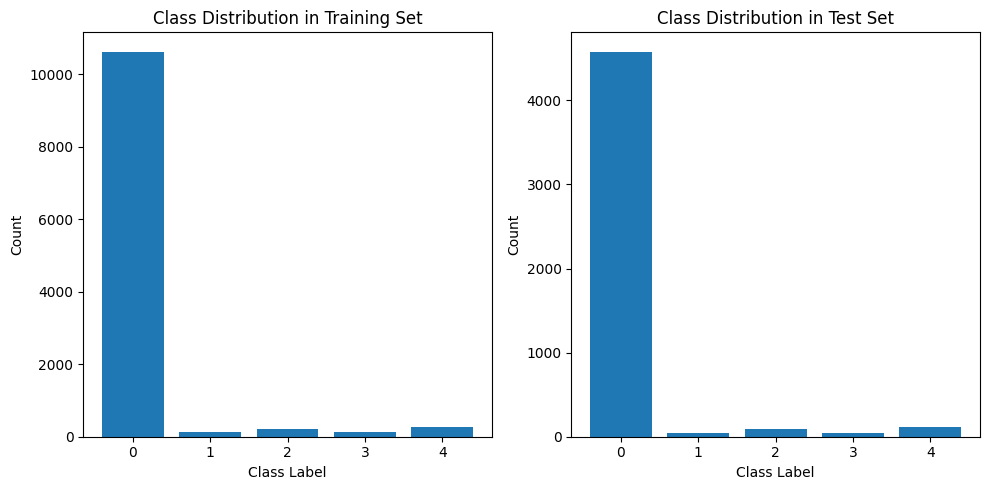

Setting class weigths to: {0: 0.214203743768225, 1: 19.136134453781512, 2: 10.398173515981735, 3: 16.265714285714285, 4: 8.220938628158844}


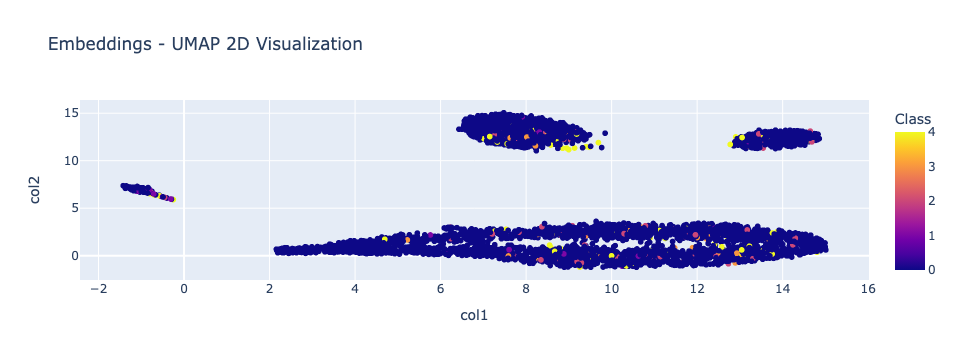

####################  Logistic Regression  ####################


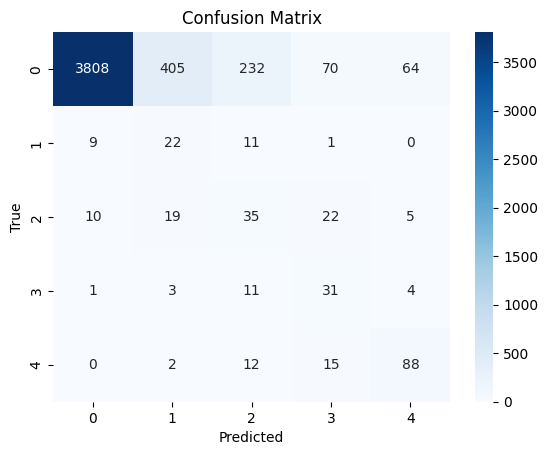

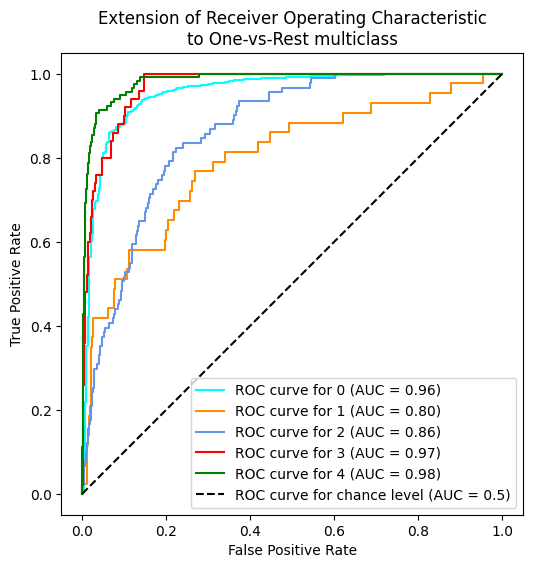

              precision    recall  f1-score   support

           0       0.99      0.83      0.91      4579
           1       0.05      0.51      0.09        43
           2       0.12      0.38      0.18        91
           3       0.22      0.62      0.33        50
           4       0.55      0.75      0.63       117

    accuracy                           0.82      4880
   macro avg       0.39      0.62      0.43      4880
weighted avg       0.95      0.82      0.87      4880

####################  Neural Network  ####################


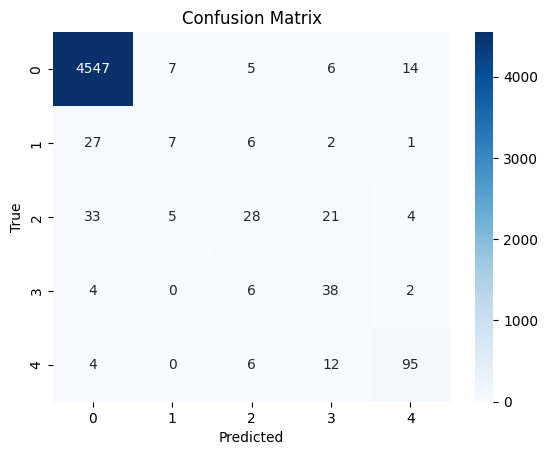

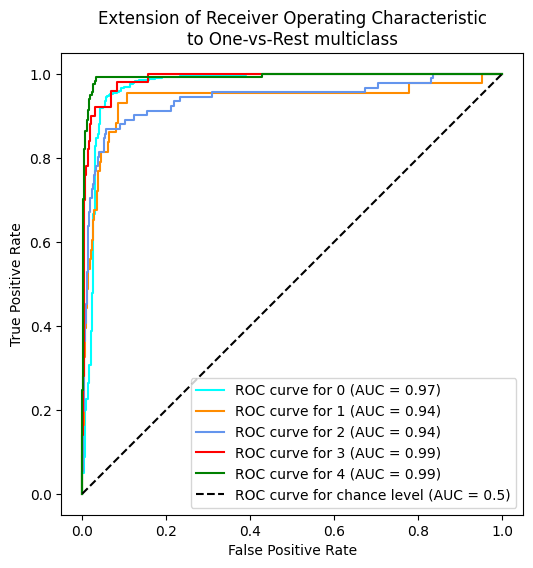

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4579
           1       0.37      0.16      0.23        43
           2       0.55      0.31      0.39        91
           3       0.48      0.76      0.59        50
           4       0.82      0.81      0.82       117

    accuracy                           0.97      4880
   macro avg       0.64      0.61      0.60      4880
weighted avg       0.96      0.97      0.96      4880



In [8]:
LABEL = 'DR_ICDR'
DR_ICDR_3 = False

run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3, extra_labels=extra_labels)

### 3 Class

Training set size is: 11386 rows and 1552 columns
Test set size is: 4880 rows and 1552 columns


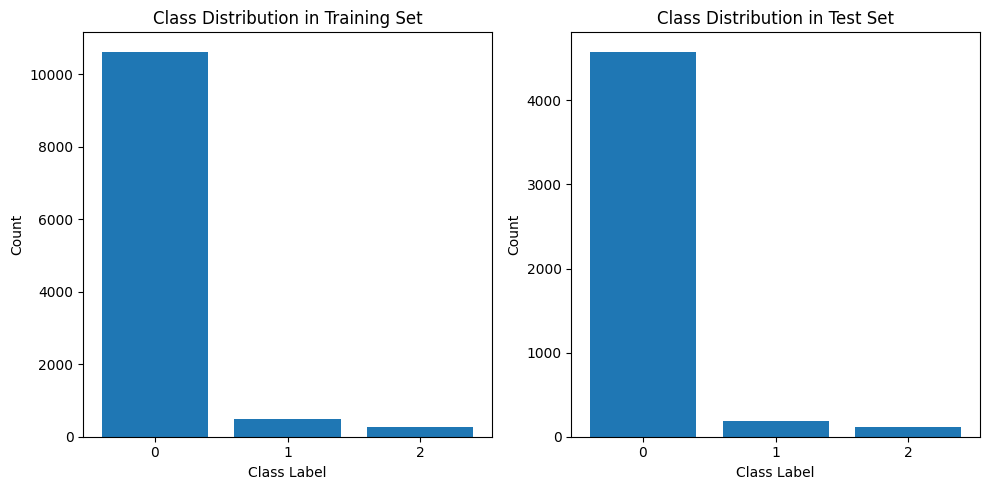

Setting class weigths to: {0: 0.35700623961370836, 1: 7.94002789400279, 2: 13.701564380264742}


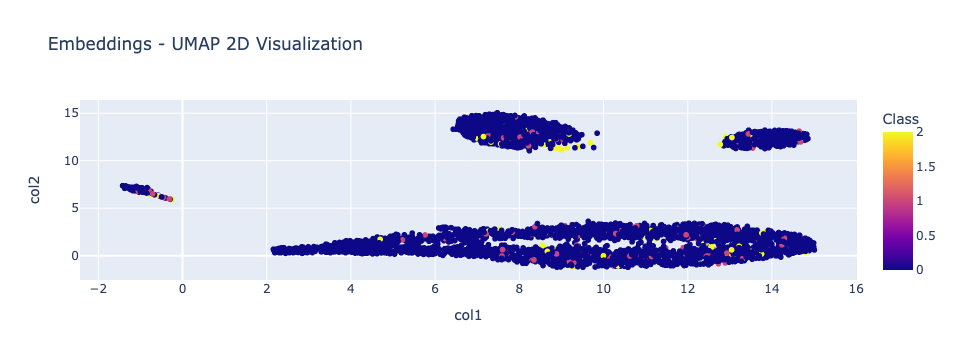

####################  Logistic Regression  ####################


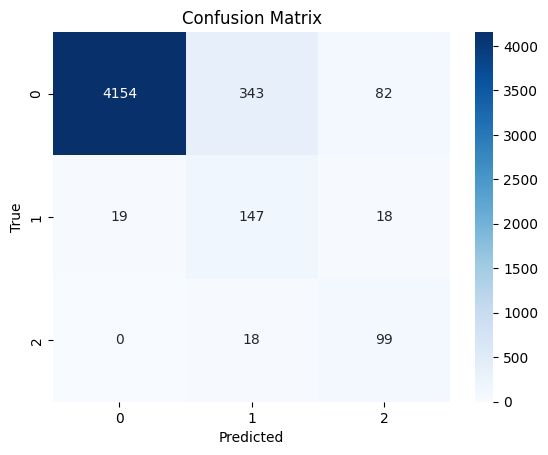

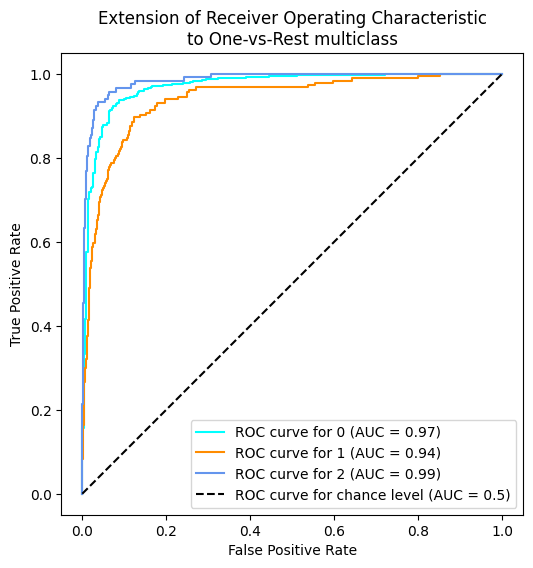

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      4579
           1       0.29      0.80      0.42       184
           2       0.50      0.85      0.63       117

    accuracy                           0.90      4880
   macro avg       0.59      0.85      0.67      4880
weighted avg       0.96      0.90      0.92      4880

####################  Neural Network  ####################


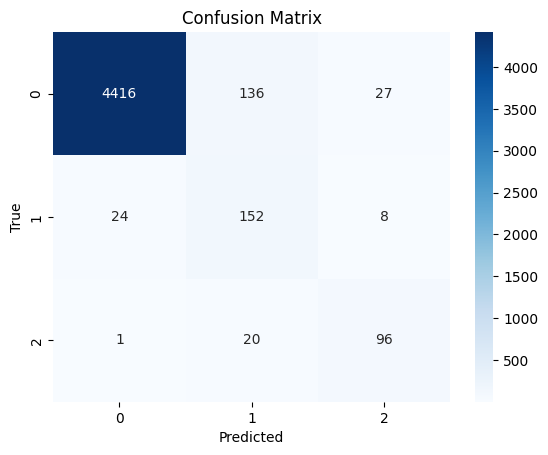

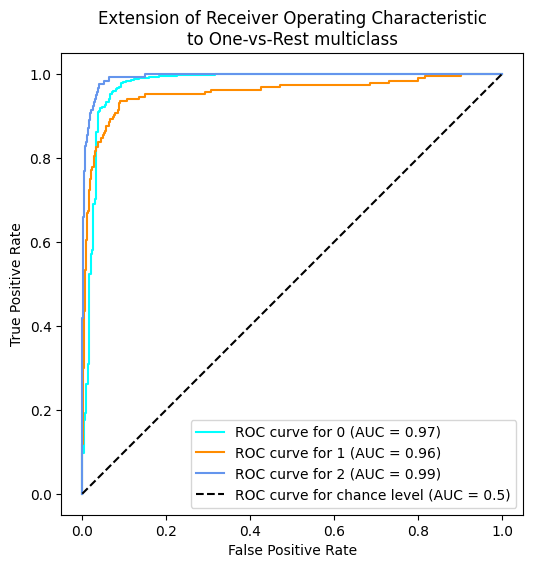

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4579
           1       0.49      0.83      0.62       184
           2       0.73      0.82      0.77       117

    accuracy                           0.96      4880
   macro avg       0.74      0.87      0.79      4880
weighted avg       0.97      0.96      0.96      4880



In [9]:
LABEL = 'DR_ICDR'
DR_ICDR_3 = True

run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3, extra_labels=extra_labels)

### 2 Class

Training set size is: 11386 rows and 1552 columns
Test set size is: 4880 rows and 1552 columns


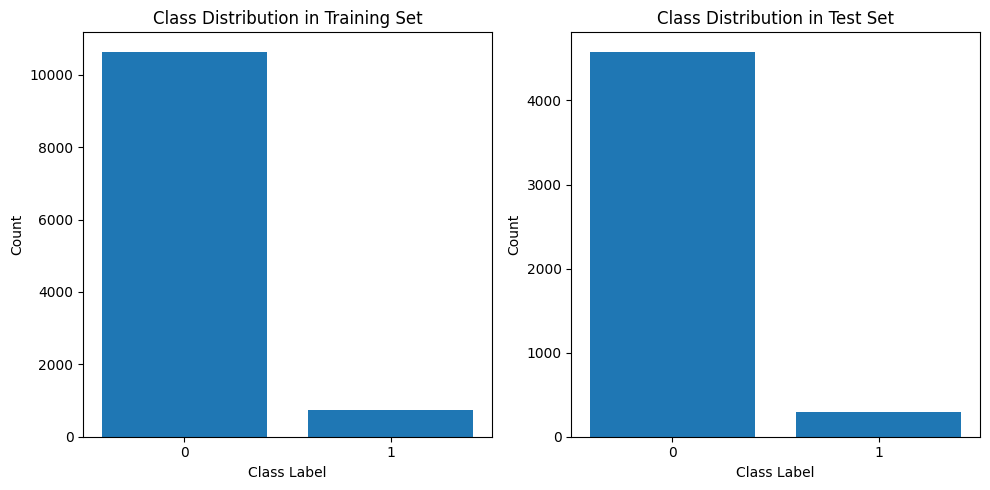

Setting class weigths to: {0: 0.5351066829589247, 1: 7.621151271753681}


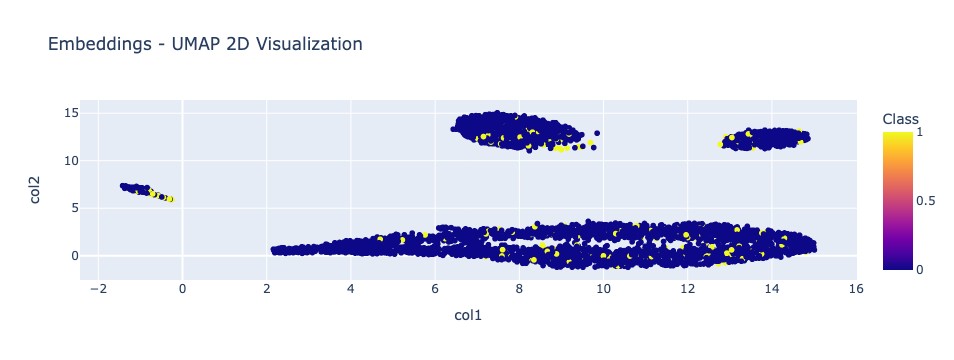

####################  Logistic Regression  ####################


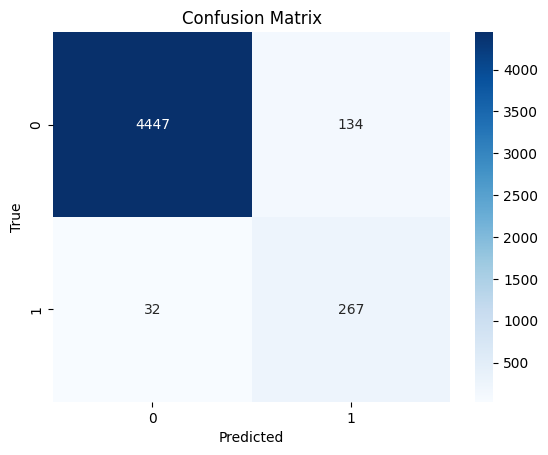

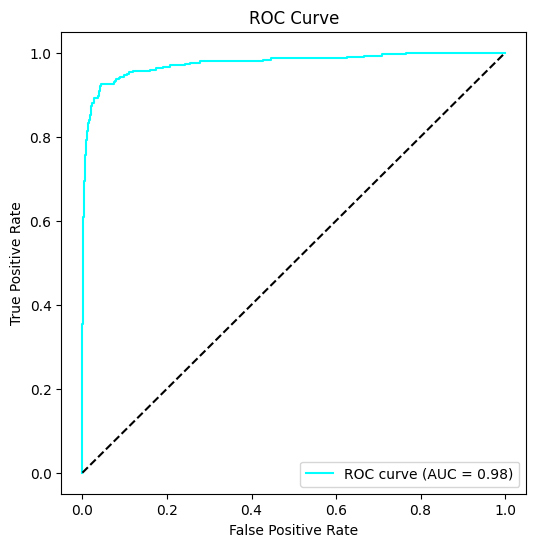

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4581
           1       0.67      0.89      0.76       299

    accuracy                           0.97      4880
   macro avg       0.83      0.93      0.87      4880
weighted avg       0.97      0.97      0.97      4880

####################  Neural Network  ####################


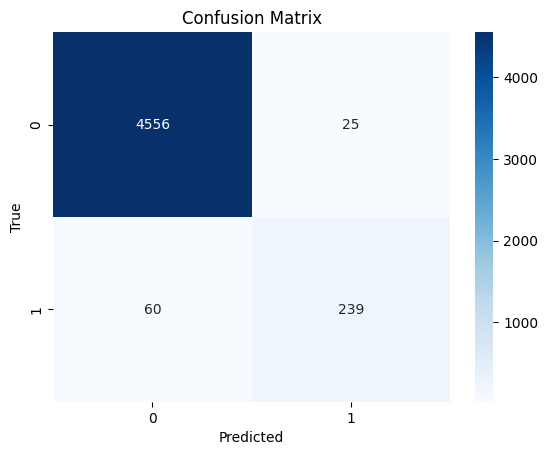

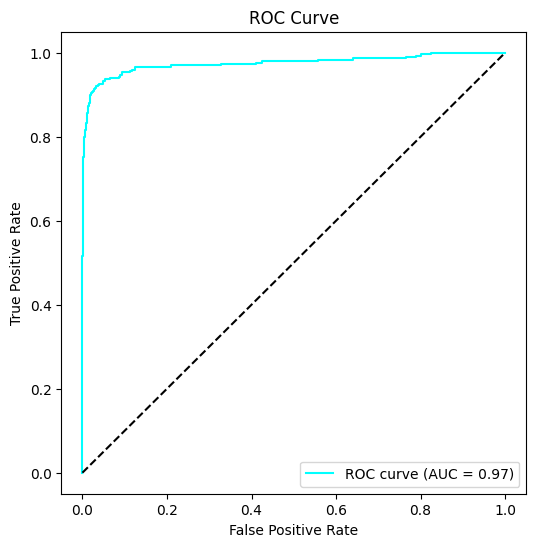

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4581
           1       0.91      0.80      0.85       299

    accuracy                           0.98      4880
   macro avg       0.95      0.90      0.92      4880
weighted avg       0.98      0.98      0.98      4880



In [10]:
LABEL = 'diabetic_retinopathy'
run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, extra_labels=extra_labels)